In [2]:
# Cell 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from APAPKineticModel import AcetaminophenPBPKModel

In [3]:
model = AcetaminophenPBPKModel()

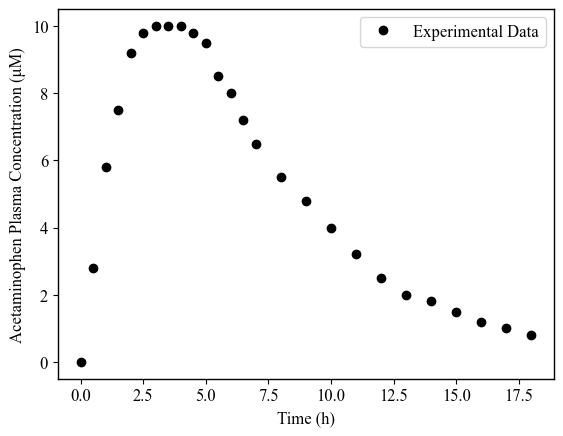

In [4]:
model.plot_exp_data()

/Users/rahulraj/Desktop/Bacteria_Pharmacokinetics-main/APAPKineticModel.py:116: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Times New Roman.
  plt.tight_layout()
/Users/rahulraj/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


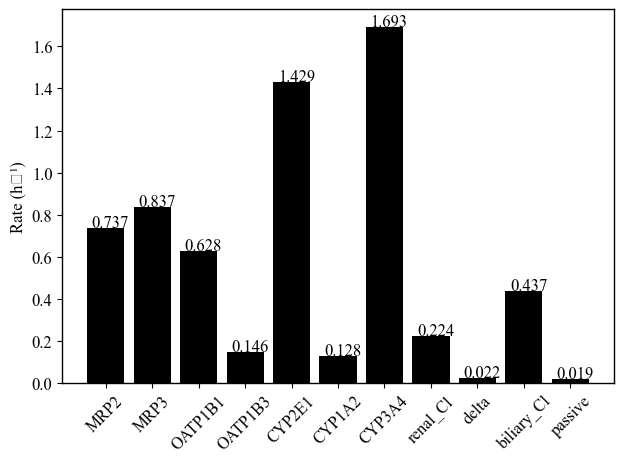

Optimization successful: True
Final rates: [0.73692484 0.83692484 0.628123   0.14621677 1.42894484 0.1275263
 1.69319582 0.22355006 0.02245201 0.43691594 0.01918141]


In [5]:
# Initial guess for rates: [ABCG2, ABCC2, SLCO2B1, MRD1, biliary_clearance, metabolism, delta, renal_clearance]
initial_rates = [0.4, 0.5, 1.0, 0.4, 0.015, 0.1, 1.8, 0.025,0.05, 0.1, 0.2]
result = model.optimize(initial_rates)
print(f"Optimization successful: {result.success}")
print(f"Final rates: {model.rates}")

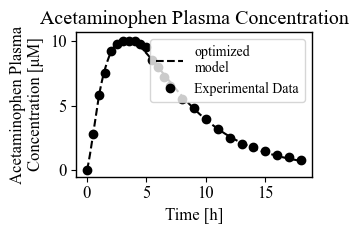

In [6]:
model.plot_model(comp_no=2, title='Acetaminophen Plasma Concentration')

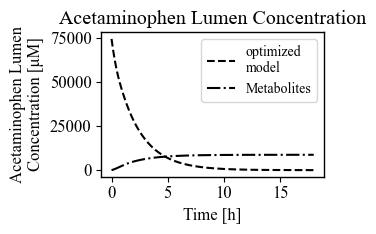

In [7]:
model.plot_model(comp_no=0, title='Acetaminophen Lumen Concentration')

Percent of acetaminophen excreted via urine: 0.662%


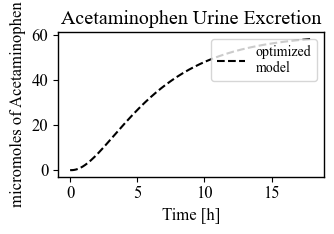

In [8]:
model.plot_model(comp_no=3, title='Acetaminophen Urine Excretion')

/Users/rahulraj/Desktop/Bacteria_Pharmacokinetics-main/APAPKineticModel.py:116: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Times New Roman.
  plt.tight_layout()
/Users/rahulraj/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


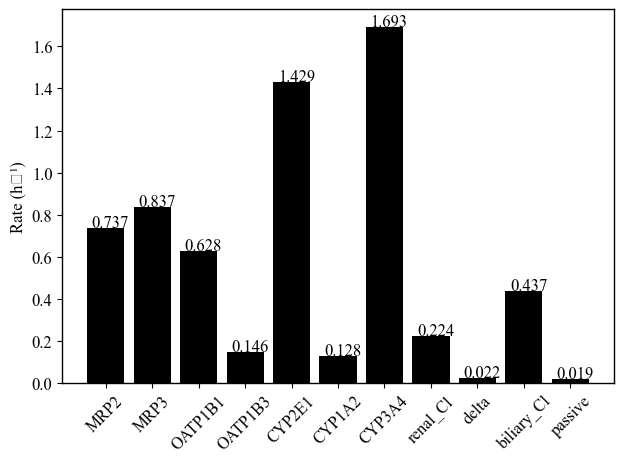

In [9]:
model.plot_rates()

/Users/rahulraj/Desktop/Bacteria_Pharmacokinetics-main/APAPKineticModel.py:116: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Times New Roman.
  plt.tight_layout()
/Users/rahulraj/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


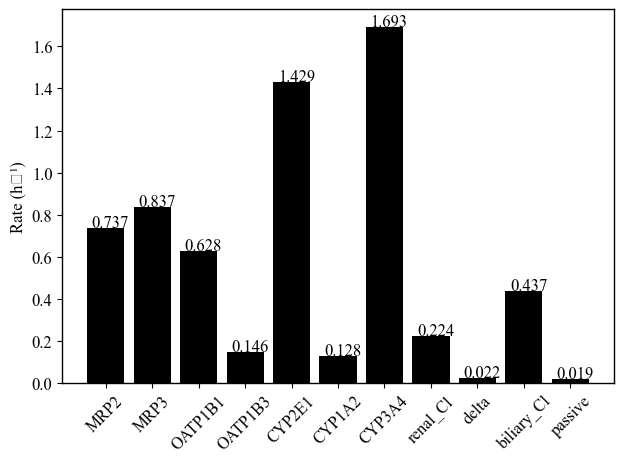

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.6967225380369112
        x: [ 7.369e-01  8.369e-01  6.281e-01  1.462e-01  1.429e+00
             1.275e-01  1.693e+00  2.235e-01  2.245e-02  4.369e-01
             1.918e-02]
      nit: 7
      jac: [ 3.829e+02  3.829e+02 -3.121e-03 -3.204e-03  2.826e-03
             2.826e-03  2.826e-03  6.999e-02  3.826e+02  3.829e+02
            -3.204e-03]
     nfev: 492
     njev: 41
 hess_inv: <11x11 LbfgsInvHessProduct with dtype=float64>

In [10]:
model.optimize(model.rates)


Gene Parameter Value Comparison (Normal vs Microgravity, using optimized rates):
  Parameter     Gene    Normal  Microgravity    log2FC
0      MRP2    ABCC2  0.736919      0.678917 -0.118272
1      MRP3    ABCC3  0.836919      0.888415  0.086145
2   OATP1B1  SLCO1B1  0.628086      0.683617  0.122227
3   OATP1B3  SLCO1B3  0.146208      0.137485 -0.088750
4    CYP2E1   CYP2E1  1.428944      1.432057  0.003140
5    CYP1A2   CYP1A2  0.127525      0.111096 -0.198983
6    CYP3A4   CYP3A4  1.693195      1.610168 -0.072537


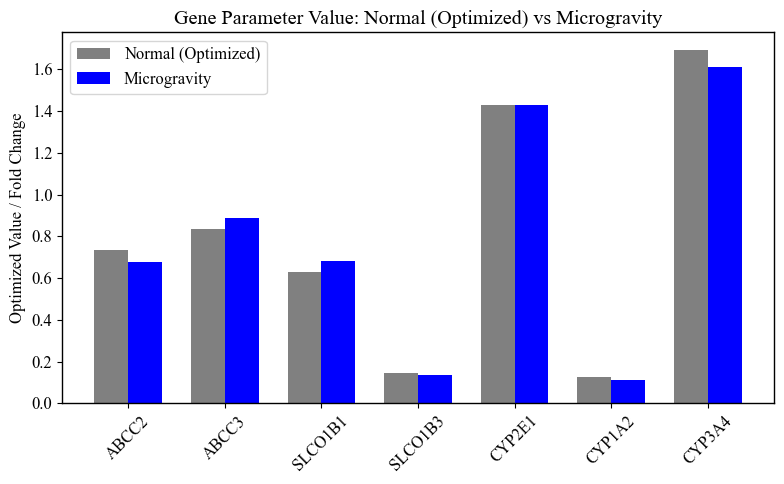

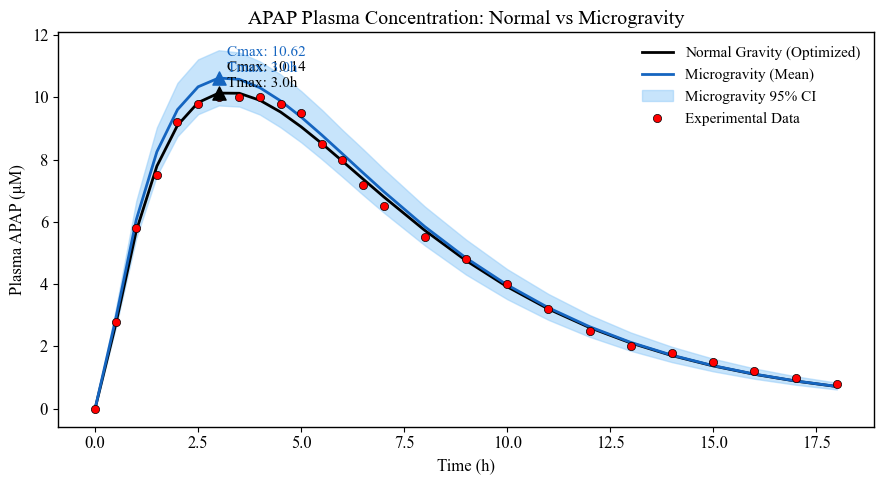

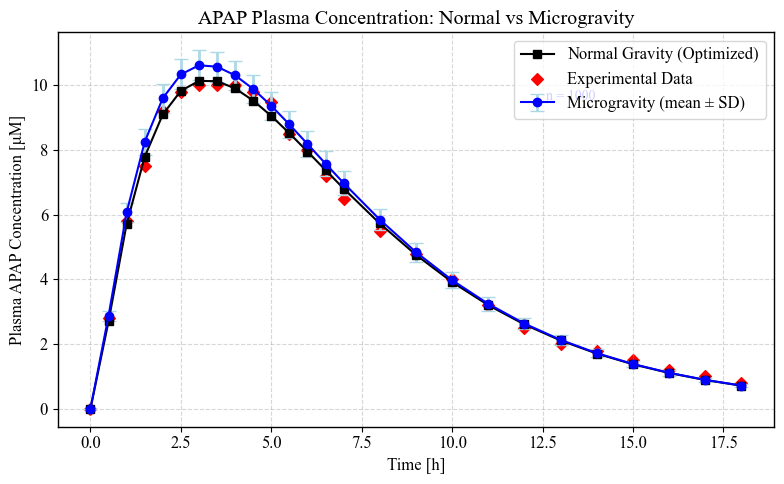

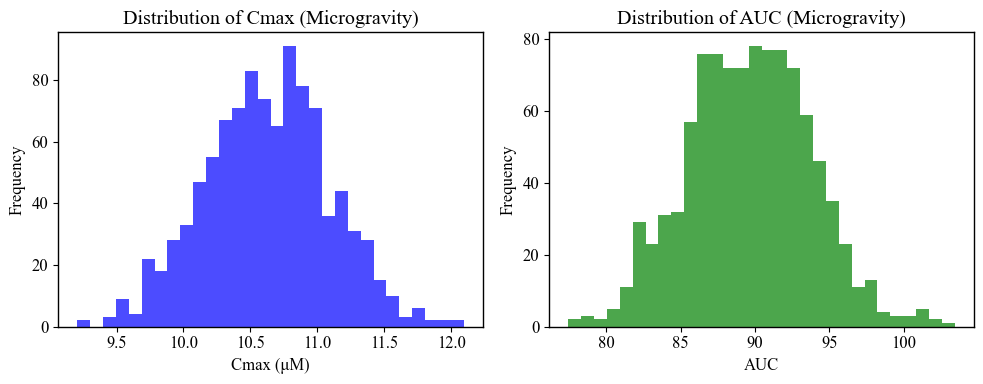

Cmax Normal: 10.14 at 3.0h, Microgravity (mean): 10.62 at 3.0h
AUC Normal: 86.75, Microgravity (mean): 89.61
Percent change in Cmax: 4.8%
Percent change in AUC: 3.3%


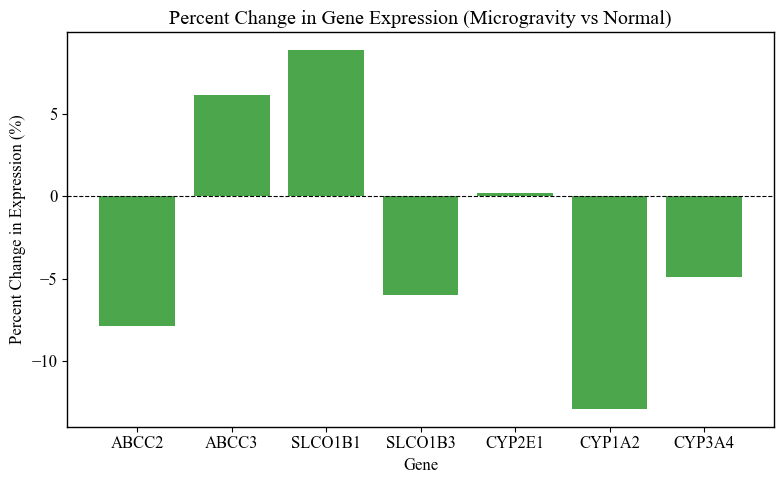

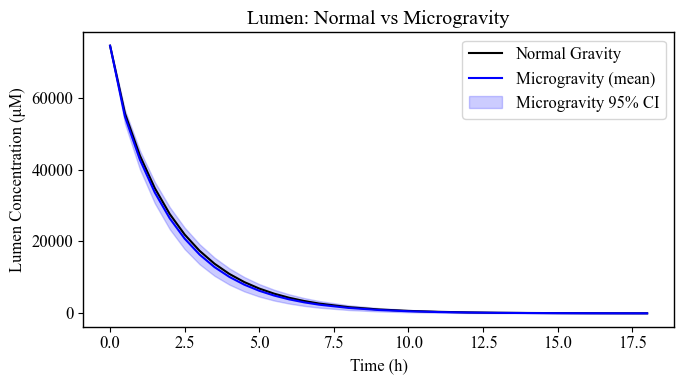

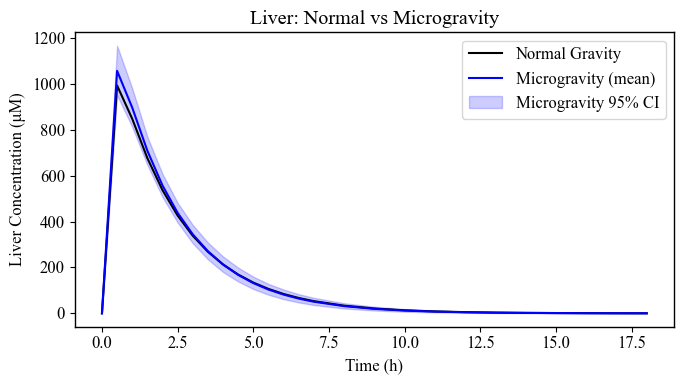

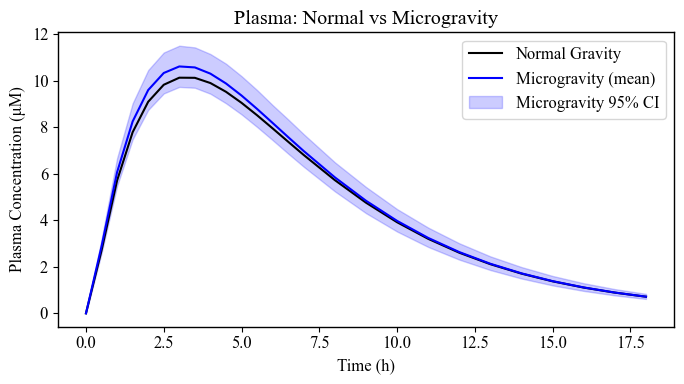

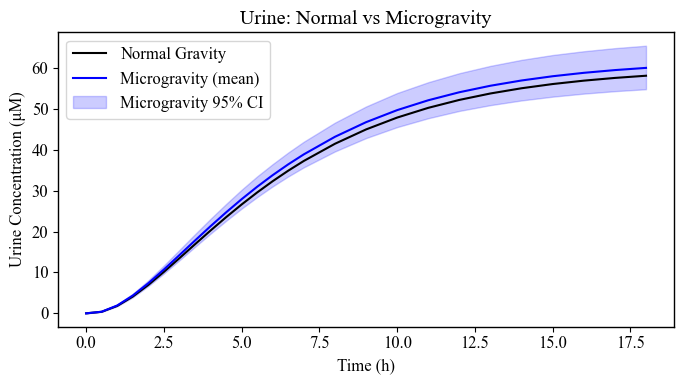

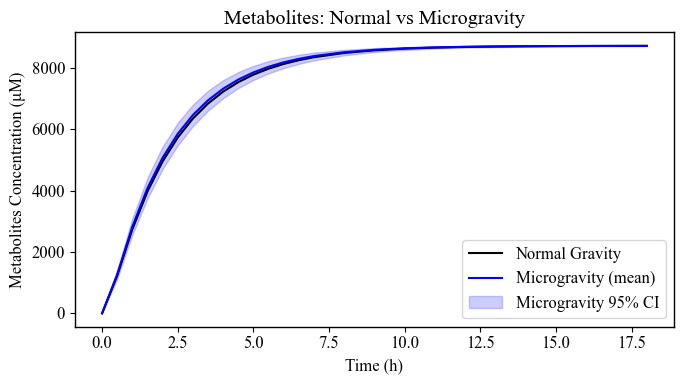

In [11]:
means, stds, lower, upper = model.simulate_microgravity('Gene_expression_APAP_processed.csv')